In [ ]:
from google.colab import files

In [ ]:
upload = files.upload()

Saving VZ.csv to VZ.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(upload['VZ.csv']))

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-28,8.993228,9.189955,8.993228,9.105643,1.643167,1690900
1,1985-01-29,9.105643,9.189955,9.077539,9.175902,1.655845,2284200
2,1985-01-30,9.175902,9.260214,9.175902,9.260214,1.671060,1490700
3,1985-01-31,9.260214,9.274266,9.218059,9.246162,1.668525,1524500
4,1985-02-01,9.232110,9.302370,9.232110,9.232110,1.665988,2789500


In [ ]:
df.Close

0        9.105643
1        9.175902
2        9.260214
3        9.246162
4        9.232110
          ...    
9068    57.259998
9069    57.270000
9070    57.470001
9071    58.419998
9072    56.570000
Name: Close, Length: 9073, dtype: float64

In [ ]:
df1  = df.fillna(method='pad')

In [ ]:
df1 =  df.reset_index()['Close']

In [ ]:
pd.isnull(df1).sum()

0

In [ ]:
df1.head()

0    9.105643
1    9.175902
2    9.260214
3    9.246162
4    9.232110
Name: Close, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

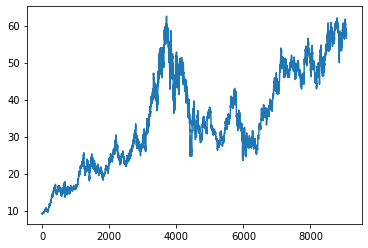

In [ ]:
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
import numpy as np

In [ ]:
a  = np.array(df1).reshape(-1,1)

In [ ]:
a

array([[ 9.105643],
       [ 9.175902],
       [ 9.260214],
       ...,
       [57.470001],
       [58.419998],
       [56.57    ]])

In [ ]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.        ],
       [0.00131578],
       [0.00289474],
       ...,
       [0.9057456 ],
       [0.92353671],
       [0.8888908 ]])

In [ ]:
training_size = int(len(df1)*0.70)

In [ ]:
training_size

6351

In [ ]:
testing_size = int(len(df1)) - training_size

In [ ]:
testing_size

2722

In [ ]:
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:]

In [ ]:
train_data

array([[0.        ],
       [0.00131578],
       [0.00289474],
       ...,
       [0.37432003],
       [0.37888676],
       [0.38204832]])

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train.shape

(6250, 100)

In [ ]:
X_train.shape[0]

6250

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
X_train

array([[[0.        ],
        [0.00131578],
        [0.00289474],
        ...,
        [0.02210526],
        [0.02263158],
        [0.02157894]],

       [[0.00131578],
        [0.00289474],
        [0.00263158],
        ...,
        [0.02263158],
        [0.02157894],
        [0.0218421 ]],

       [[0.00289474],
        [0.00263158],
        [0.00236842],
        ...,
        [0.02157894],
        [0.0218421 ],
        [0.02447368]],

       ...,

       [[0.34006952],
        [0.34059646],
        [0.34428498],
        ...,
        [0.36184934],
        [0.36290318],
        [0.36430834]],

       [[0.34059646],
        [0.34428498],
        [0.34867607],
        ...,
        [0.36290318],
        [0.36430834],
        [0.37800855]],

       [[0.34428498],
        [0.34867607],
        [0.35939034],
        ...,
        [0.36430834],
        [0.37800855],
        [0.37432003]]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
model  =  Sequential()
model.add(LSTM(64,return_sequences = True,input_shape=(100,1)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='linear'))

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 64)           16896     
_________________________________________________________________
dense_1 (Dense)              (None, 100, 64)           4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)              

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=5,batch_size=64)

Epoch 1/5
98/98 [==============================] - 19s 161ms/step - loss: 0.0935 - val_loss: 0.0022
Epoch 2/5
98/98 [==============================] - 15s 155ms/step - loss: 0.0069 - val_loss: 6.9140e-04
Epoch 3/5
98/98 [==============================] - 16s 159ms/step - loss: 0.0043 - val_loss: 9.2876e-04
Epoch 4/5
98/98 [==============================] - 15s 155ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 5/5
98/98 [==============================] - 15s 155ms/step - loss: 0.0028 - val_loss: 6.4257e-04


In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

ValueError: ignored

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

49.46421604684567

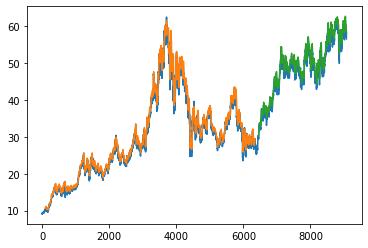

In [ ]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

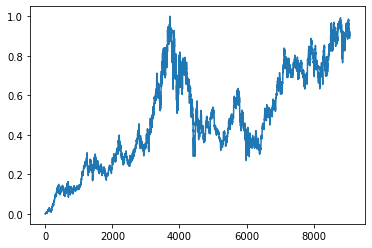

In [ ]:
plt.plot(df1)
plt.show()

In [ ]:
len(test_data)

2722

In [ ]:
x_input=test_data[2622:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9295731]
101
1 day input [0.96455009 0.96211549 0.95237715 0.95387539 0.94432431 0.9491935
 0.95911908 0.96436276 0.96005544 0.96417552 0.95968087 0.94582255
 0.94975531 0.93271325 0.93795694 0.94170245 0.94114066 0.93889337
 0.94357526 0.94282614 0.93889337 0.94675891 0.94301338 0.94582255
 0.93795694 0.94057885 0.94469886 0.94114066 0.92372403 0.91866759
 0.91660754 0.90256188 0.90162553 0.89226175 0.90312377 0.91492206
 0.91211297 0.90406013 0.88402165 0.89244899 0.8967564  0.91005294
 0.9109893  0.90106372 0.91848035 0.92559676 0.95012986 0.97372653
 0.97185381 0.96792105 0.97297748 0.96979376 0.96717193 0.95911908
 0.95705904 0.95387539 0.95743361 0.96511188 0.96080456 0.96398828
 0.96080456 0.96398828 0.97859575 0.98571223 0.98215394 0.97840842
 0.98028123 0.98046846 0.96267728 0.95968087 0.95275172 0.9634264
 0.95144079 0.95331351 0.96174092 0.94357526 0.93421149 0.93364961
 0.93140232 0.93402418 0.93084051 0.91829302 0.92971684 0.93158956
 0.9265332  0.93982973 0.92559676 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

9073

ValueError: ignored

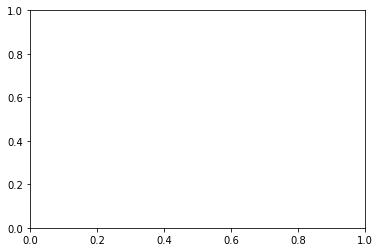

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2661:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

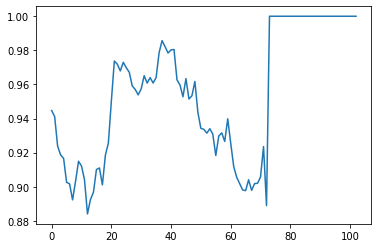

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[9000:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

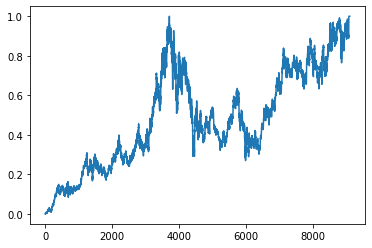

In [ ]:
plt.plot(df3)